In [2]:
using PyPlot

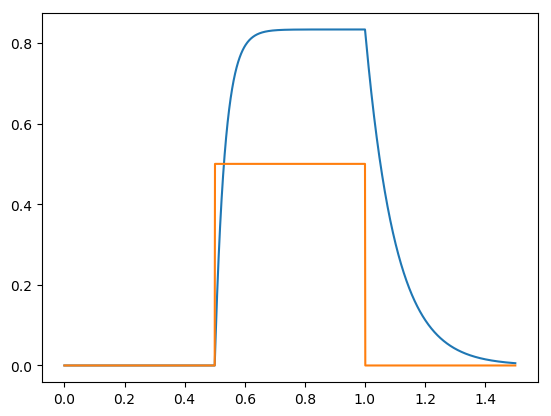

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f71c506f310>

In [71]:
function RK4(u::Float64, du, t::Float64, dt::Float64)
    k1 = du(t, u)
    k2 = du(t + dt/2, u + dt/2*k1)
    k3 = du(t + dt/2, u + dt/2*k2)
    k4 = du(t + dt, u + dt*k3)
    dU = k1 + 2*k2 + 2*k2 + k4
    return U = u + dU*dt/6.0
end

function Int4(u::Vector{Float64}, du, t, dt)
    A = 18.0/11.0
    B = -9.0/11.0
    C = 2.0/11.0
    D = 6.0/11.0
    
    print(length(u))
    # U = A*u[n-1] + B*[n-2] + C*[n-3] + D*du*dt
    return U = A*u[3] + B*u[2] + C*u[1] + D*du(t, u[4])*dt
end

function audot(t, u, a)
    beta = 0.2
    tau = 0.02
    numerator = u(t) - (beta + (1 - beta) * u(t))*a
    return numerator/tau
end

function excite(t::Float64)
    T0 = 0.5
    T1 = 1
    LVL = 0.5
    ret = 0
    if t > T1
        return 0
    end
    if t > T0
        return LVL
    end
    return 0
end

adot = (t, a) -> audot(t, excite, a)

function norm_length_tension(norm_length)
    A = -3.0508;
    B = 5.9758;
    C = -1.9597;
    return A.*(norm_length).^2 + B*norm_length + C;
end

start = 0.0
fin = 1.5
dt = 0.001
time = start:dt:fin
excitation = zeros(length(time))
a = zeros(length(time)+1)

for i in 1:length(time)
    excitation[i] = excite(time[i])
    a[i+1] = RK4(a[i], adot, time[i], dt)
end

plot(time, a[1:length(time)])
plot(time, excitation)


In [24]:
?reduce

search: reduce reducedim mapreduce mapreducedim



```
reduce(op, v0, itr)
```

Reduce the given collection `ìtr` with the given binary operator `op`. `v0` must be a neutral element for `op` that will be returned for empty collections. It is unspecified whether `v0` is used for non-empty collections.

Reductions for certain commonly-used operators have special implementations which should be used instead: `maximum(itr)`, `minimum(itr)`, `sum(itr)`, `prod(itr)`, `any(itr)`, `all(itr)`.

The associativity of the reduction is implementation dependent. This means that you can't use non-associative operations like `-` because it is undefined whether `reduce(-,[1,2,3])` should be evaluated as `(1-2)-3` or `1-(2-3)`. Use `foldl` or `foldr` instead for guaranteed left or right associativity.

Some operations accumulate error, and parallelism will also be easier if the reduction can be executed in groups. Future versions of Julia might change the algorithm. Note that the elements are not reordered if you use an ordered collection.

```
reduce(op, itr)
```

Like `reduce(op, v0, itr)`. This cannot be used with empty collections, except for some special cases (e.g. when `op` is one of `+`, `*`, `max`, `min`, `&`, `|`) when Julia can determine the neutral element of `op`.


$$
\begin{aligned}
F_m &= F_t                         \\
\dot{F}_m &= \dot{F}_t             \\
F_t &= K_t(L_t - L_{st})           \\
F_m &= A\cdot FV(V_m)\cdot LT(L_m) \\
L_T &= L_{mt} - L_m                \\
\tilde{F}_m &= \frac{F_m}{F_0}     \\
\tilde{L}_m &= \frac{L_m}{L_0}     \\
\tilde{V}_m &= \frac{V_m}{V_{max}} \\
\dot{a}(t) &= \frac{u(t)-a(t)}{\tau} \\
\dot{a}(t) &= \frac{u(t) - (\beta + (1 - \beta) u(t)) a(t)}{\tau} \\
\varepsilon &= \frac{L_t - L_{st}}{L_{st}} \\
K_t &= \frac{F_0}{\varepsilon_{max}L_{st}}
\end{aligned}
$$

$L_{st}$ is the length of the slack tendon.
$a$ is muscle activation
$u$ is neural excitation
$\tau$ is time constant
$\varepsilon$ is tendon strain.

In [9]:
?if

search: if ifft ifft! ifelse ifftshift diff shift! UniformScaling notify elseif



`if`-`elseif`-`else` performs conditional evaluation, which allows portions of code to be evaluated or not evaluated depending on the value of a boolean expression. Here is the anatomy of the `if`-`elseif`-`else` conditional syntax:

```
if x < y
    println("x is less than y")
elseif x > y
    println("x is greater than y")
else
    println("x is equal to y")
end
```

If the condition expression `x < y` is true, then the corresponding block is evaluated; otherwise the condition expression `x > y` is evaluated, and if it is true, the corresponding block is evaluated; if neither expression is true, the `else` block is evaluated. The `elseif` and `else` blocks are optional, and as many `elseif` blocks as desired can be used.
